# NLP Project: Misinformation detection 

<div style="text-align: center;">
    <img src="image/fake_news.jpeg" alt="Exemple d'image" style="width: 30%;"/>
</div>

---

### **Project Overview**

This project is part of the **NLP course assessment**. The evaluation takes the form of a **personal project**, where the goal is to write a scientific mini-article reporting an experiment on an NLP problem. The approach is as follows:

1. **Choice of an NLP problem**: Select a problem for which there are reference datasets and state-of-the-art results published in peer-reviewed conferences or journals.
2. **Brief state-of-the-art**: Summarize the existing research and methods related to the problem.
3. **Proposal and justification of an experiment**: Propose an experiment to evaluate a model and justify its relevance.
4. **Data preparation**: Retrieve, format, and describe the data statistically.
5. **Experiments**: Conduct experiments with the proposed model.
6. **Analysis and conclusion**: Analyze the results and provide a conclusion.


### **Group Members**

- **`Amine Razig`**
- **`Mohamed Keteb`**


### **Objective**

The objective of this project is to explore an NLP problem in depth, implement various methods, and analyze the results to draw meaningful conclusions. This will involve both classical NLP techniques and modern deep learning approaches.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Présenation du projet  : 

<div style="text-align: center;">
    <img src="image/illustration2.png" alt="Exemple d'image" style="width: 50%;"/>
</div>


### **Plan des explorations :**

### Étape 1 : Analyse exploratoire des données (EDA)

    **Objectif** : Comprendre la structure des données, détecter les valeurs manquantes, visualiser la distribution des classes, et explorer les caractéristiques textuelles.


### Étape 2 : Prétraitement des données

    **Objectif** : Nettoyer les données textuelles pour les rendre exploitables par des modèles NLP.

### Étape 3 : Représentation des textes

**Objectif** : Transformer les textes en une représentation numérique.

    **Méthodes à tester** :
    - Bag of Words (BoW).
    - TF-IDF.
    - Word embeddings (Word2Vec, GloVe, FastText).
    - Sentence embeddings (BERT, RoBERTa).


### Étape 4 : Modélisation classique

**Objectif** : Utiliser des modèles de machine learning classiques pour classifier les textes.

    **Modèles à tester** :
    - Logistic Regression.
    - Naive Bayes.
    - Support Vector Machines (SVM).
    - Random Forest.


### Étape 5 : Modélisation avancée (Deep Learning)

**Objectif** : Utiliser des modèles de deep learning pour améliorer les performances.

    **Modèles à tester** :
    - RNN (LSTM, GRU).
    - CNN pour le texte.
    - Transformers (BERT, DistilBERT, etc.).


### Étape 6 : Évaluation des modèles

## Étape 1 : Analyse exploratoire des données (EDA)

Fake news dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  object
dtypes: object(5)
memory usage: 917.4+ KB
None

True news dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  object
dtypes: object(5)
memory usage: 836.7+ KB
None

Combined dataset:
label
fake    23481
true    21417
Name: count, dtype: int64


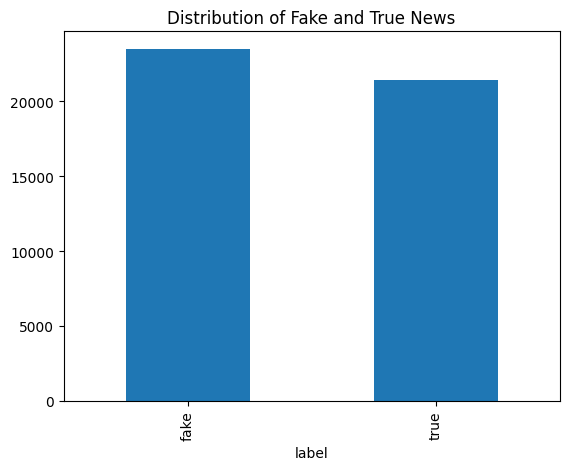

In [4]:
from src.eda import load_and_explore_data

data = load_and_explore_data('data/Fake.csv', 'data/True.csv')

### Statistiques descriptives sur les longueurs

## Étape 2 : Prétraitement des données

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Télécharger les ressources nécessaires de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialiser les stopwords et le lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les caractères spéciaux et les chiffres
    text = re.sub(r'[^a-z\s]', '', text)
    # Supprimer les stopwords et appliquer la lemmatisation
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Appliquer le prétraitement sur les colonnes 'title' et 'text'
data['cleaned_title'] = data['title'].apply(preprocess_text)
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Afficher un exemple avant et après le nettoyage
print("Exemple avant nettoyage :")
print(data['text'].iloc[0])
print("\nExemple après nettoyage :")
print(data['cleaned_text'].iloc[0])

[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/onyxia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/onyxia/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Exemple avant nettoyage :
Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His

## Étape 3 : Représentation des textes
#### L'objectif est de transformer les textes en une représentation numérique. On test diffrentes approches : 

**Word Embeddings (Word2Vec, GloVe, FastText)**

In [8]:
from gensim.models import Word2Vec

# Tokeniser les textes nettoyés
tokenized_texts = data['cleaned_text'].apply(lambda x: x.split())

# Entraîner un modèle Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Exemple : Obtenir le vecteur pour un mot
print("Vecteur pour le mot 'news':", word2vec_model.wv['news'])

ModuleNotFoundError: No module named 'numpy.char'

## Étape 4 : Modélisation classique
Objectif : Utiliser des modèles de machine learning classiques pour classifier les textes.

In [6]:
# 3. Fonction pour obtenir un vecteur moyen pour chaque document
def document_vector(doc):
    doc = [word for word in doc if word in word2vec_model.wv]
    if len(doc) == 0:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word2vec_model.wv[doc], axis=0)

# 4. Calculer les vecteurs pour tous les textes
X_wv = np.array([document_vector(doc) for doc in tokenized_texts])


NameError: name 'tokenized_texts' is not defined

In [11]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X = X_wv  # Utilisez TF-IDF ou une autre représentation
y = data['label']   # La colonne des étiquettes ('fake' ou 'true')

# Encodage des étiquettes en valeurs numériques
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)

Taille de l'ensemble d'entraînement : (35918, 5000)
Taille de l'ensemble de test : (8980, 5000)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialiser et entraîner le modèle
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Prédictions
y_pred = logistic_model.predict(X_test)

# Évaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.987305122494432

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [13]:
from sklearn.naive_bayes import MultinomialNB

# Initialiser et entraîner le modèle
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Prédictions
y_pred = nb_model.predict(X_test)

# Évaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.929064587973274

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      4733
           1       0.93      0.92      0.92      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [14]:
from sklearn.svm import LinearSVC

# Initialiser et entraîner le modèle
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Prédictions
y_pred = svm_model.predict(X_test)

# Évaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

SVM Accuracy: 0.9947661469933184

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4733
           1       0.99      1.00      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialiser et entraîner le modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_model.predict(X_test)

# Évaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9974387527839643

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

